In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pddf = pd.read_csv('/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv


Things I want to do with this data set
* Conduct EDA - summary
* Check for missing variables in all the columns
* Test the normality of each column and plot each
* Check the correlation between each column

In [77]:
pddf.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


find the mean of the sales columns

In [78]:
pddf.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,918.000000,9.180000e+02,9.180000e+02,9.180000e+02
mean,458.500000,1.677469e+08,2.301434e+08,3.968668e+08
std,265.148072,1.040360e+08,2.176011e+08,3.082629e+08
min,0.000000,8.036084e+07,2.600000e+02,8.160000e+07
25%,229.250000,1.016071e+08,8.845620e+07,2.005564e+08
50%,458.500000,1.321351e+08,1.638819e+08,3.019416e+08
75%,687.750000,1.913905e+08,2.885577e+08,4.750718e+08
max,917.000000,9.366622e+08,2.086739e+09,2.847246e+09


checking for the NaNs in the different columns

In [79]:
pddf.isnull().values.any()

True

getting the number of NaNs column by column

In [80]:
countofnan = pddf.isnull().sum()
print (countofnan)

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64


dropping the column 'Unnamed'

In [81]:
 df = pd.DataFrame(pddf) # convert the data to a data frame first
  

In [82]:
df.drop(['Unnamed: 0'], axis=1)

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [83]:
# check the unique number of values in the distributor column
df['Distributor'].nunique()

34

(array([272., 200., 119., 175.,  40.,  21.,   6.,   8.,   9.,  15.,  15.,
          4.,   9.,   3.,   3.,   2.,  10.,   1.,   4.,   2.]),
 array([ 0.  ,  1.65,  3.3 ,  4.95,  6.6 ,  8.25,  9.9 , 11.55, 13.2 ,
        14.85, 16.5 , 18.15, 19.8 , 21.45, 23.1 , 24.75, 26.4 , 28.05,
        29.7 , 31.35, 33.  ]),
 <BarContainer object of 20 artists>)

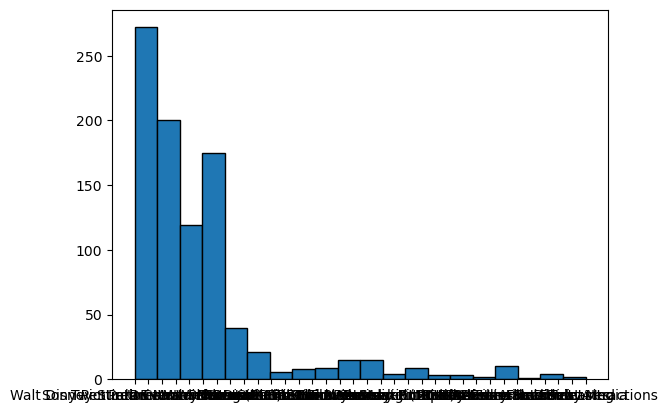

In [84]:
# plot for the distribution of the distributor column
import matplotlib.pyplot as plt
plt.hist(df['Distributor'], edgecolor='black', bins=20)

this is positively skewed

(array([32., 41., 68., 54., 62., 61., 59., 80., 37., 36., 35., 62., 48.,
        77., 45., 50., 18., 39.,  7.,  7.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

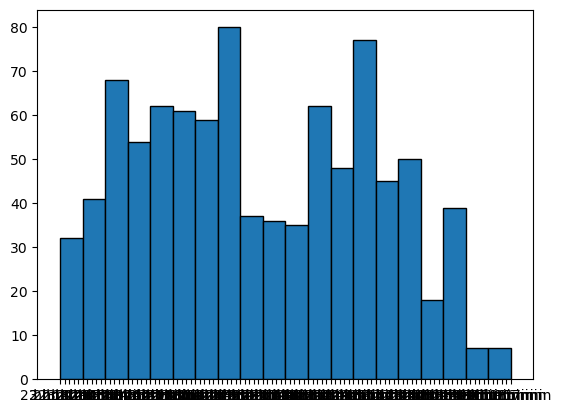

In [85]:
# check for the distribution of the Movie Runtime column
plt.hist(df['Movie Runtime'], edgecolor='black', bins=20)

In [86]:
# check the unique number of values in the License column
license_col = df['License'].unique()
print(license_col)

['PG-13' nan 'PG' 'G' 'R']


In [87]:
# For License column
# replace Nan with 'U'
df['License'] = df['License'].fillna('Unknown')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'R'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'PG'),
  Text(4, 0, 'G')])

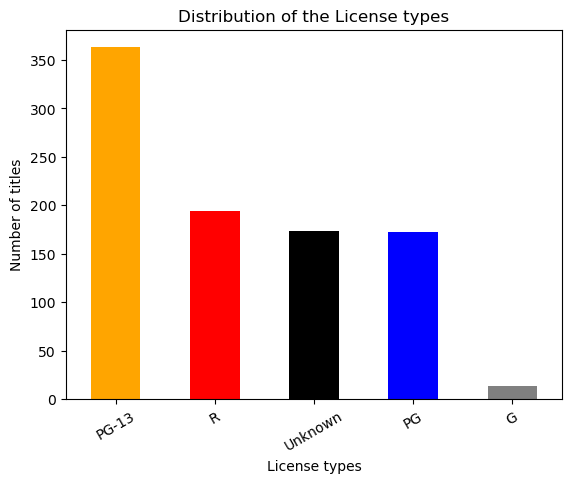

In [88]:
# plot a bar chart of the license types
# Create bars with different colors
bar_colors = ['orange', 'red', 'black', 'blue', 'grey']
df['License'].value_counts().plot(kind='bar', color=bar_colors)
plt.title("Distribution of the License types")
plt.xlabel("License types")
plt.ylabel("Number of titles")
# rotate the x-labels by 30 degrees
# and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center") 

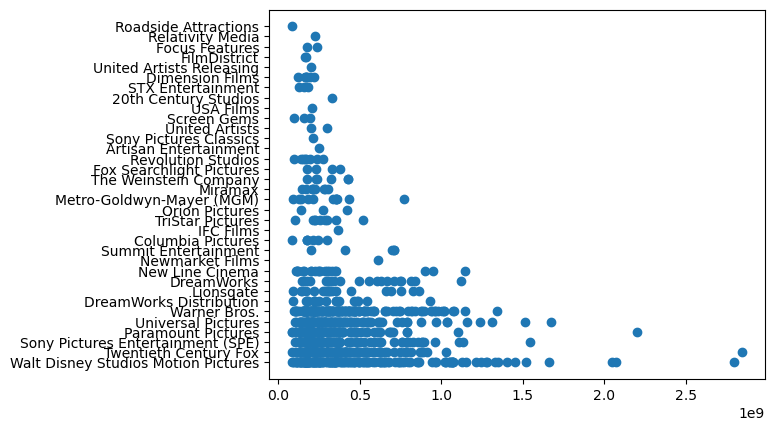

In [89]:
#check the correlation between world sales and distributor
data1 = df['World Sales (in $)']
data2 = df['Distributor']
plt.scatter(data1, data2)
plt.show()

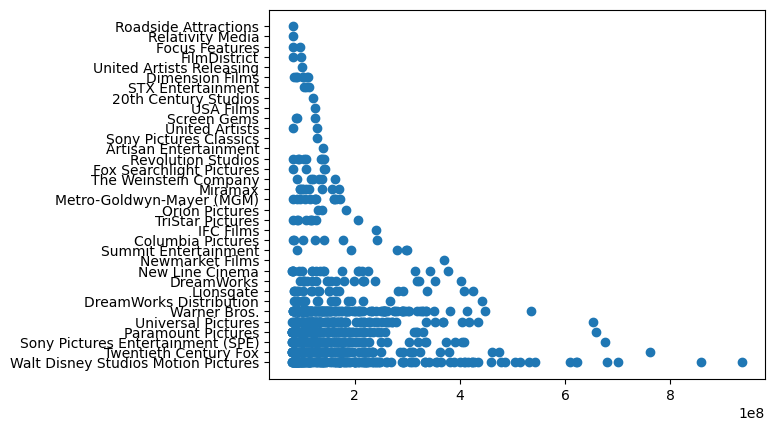

In [90]:
#check the correlation between Domestic sales and distributor
data3 = df['Domestic Sales (in $)']
data4 = df['Distributor']
plt.scatter(data3, data4)
plt.show()

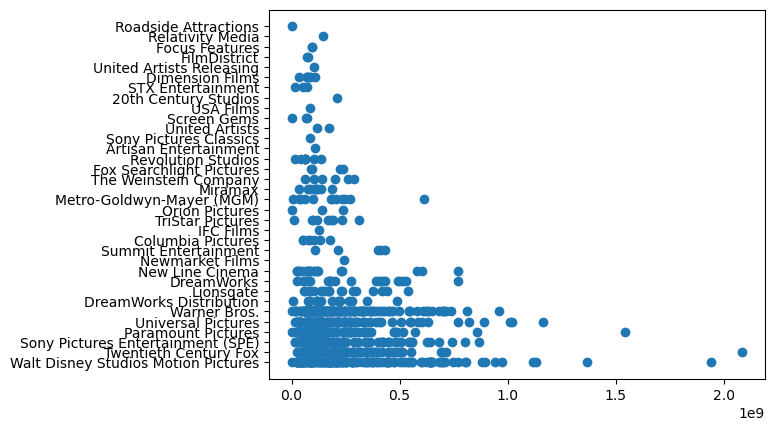

In [92]:
#check the correlation between International sales and distributor
data5 = df['International Sales (in $)']
data6 = df['Distributor']
plt.scatter(data5, data6)
plt.show()